<a href="https://colab.research.google.com/github/ARC040306/Metodos-Numericos-I/blob/main/Polinomio_Interpolante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ingresa el polinomio (ejemplo: x*3 - 2*x*2 + 7*x - 5): x*3 - 2*x*2 + 7*x -5
 Ingrese los puntos de datos tiene la tabla 6
Ingrese el valor de x_1: 0
Ingrese el valor de x_2: 1
Ingrese el valor de x_3: 2
Ingrese el valor de x_4: 3
Ingrese el valor de x_5: 4
Ingrese el valor de x_6: 5

Tabla de Resultados y Diferencias Finita:
0.0 | -5.00 | 6.00 | 0.00 | 0.00 | 0.00 | 0.00
1.0 | 1.00 | 6.00 | 0.00 | 0.00 | 0.00 |     
2.0 | 7.00 | 6.00 | 0.00 | 0.00 |      |     
3.0 | 13.00 | 6.00 | 0.00 |      |      |     
4.0 | 19.00 | 6.00 |      |      |      |     
5.0 | 25.00 |      |      |      |      |     


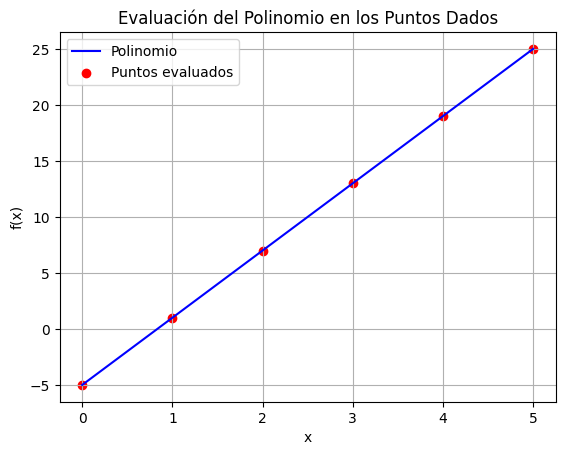

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from sympy import sympify, symbols

# Función con el polinomio en los puntos agragados
def evaluar_polinomio(polinomio_str, puntos):
    x = symbols('x')
    polinomio = sympify(polinomio_str)

    # Evaluar el polinomio en los puntos proporcionados
    resultados = []
    for punto in puntos:
        valor = polinomio.subs(x, punto)
        resultados.append(valor)

    return resultados

# Calculamos las diferencias finitas
def diferencias_finitas(F):
    n = len(F)
    diferencias = [np.copy(F)]
    for j in range(1, n):
        dif = np.zeros(n-j)
        for i in range(n-j):
            dif[i] = diferencias[j-1][i+1] - diferencias[j-1][i]
        diferencias.append(dif)

    return diferencias

# Graficamos  el polinomio de Newton y los puntos de la tabla
def graficar_polinomio(polinomio_str, puntos, resultados):
    x = symbols('x')
    polinomio = sympify(polinomio_str)
    x_vals_denso = np.linspace(min(puntos), max(puntos), 500)
    y_vals_denso = [polinomio.subs(x, xi) for xi in x_vals_denso]

    # Graficando los puntos de evaluación
    plt.plot(x_vals_denso, y_vals_denso, label="Polinomio", color='b')
    plt.scatter(puntos, resultados, color='red', marker='o', label="Puntos evaluados")
    plt.title("Evaluación del Polinomio en los Puntos Dados")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Imprimimos  la tabla de diferencias finitas
def imprimir_tabla(x_vals, F, diferencias):
    # Filas de la tabla de diferencias
    for i in range(len(x_vals)):
        row = [f"{x_vals[i]:.1f}", f"{F[i]:.2f}"]  # El valor de x y f(x)
        for j in range(1, len(diferencias)):
            if i < len(diferencias[j]):
                row.append(f"{diferencias[j][i]:.2f}")
            else:
                row.append("    ")  # Se deja vacío si no hay más diferencias
        print(" | ".join(row))  # Imprime la fila formateada

# Ingresa los puntos el usuario
def ingresar_puntos():
    # Ingresar el número de puntos
    n = int(input(" Ingrese los puntos de datos tiene la tabla "))

    # lista para los puntos
    puntos = []

    # Ingresar los valores de x
    for i in range(n):
        x = float(input(f"Ingrese el valor de x_{i+1}: "))
        puntos.append(x)

    return puntos

# Función para ingresar el polinomio
def ingresar_polinomio():
    # Ingresar el polinomio como una cadena de texto
    polinomio = input("Ingresa el polinomio (ejemplo: x*3 - 2*x*2 + 7*x - 5): ")
    return polinomio

# Función principal
def main():
    # Ingresar el polinomio
    polinomio_str = ingresar_polinomio()

    # Ingresar los puntos para evaluar el polinomio
    puntos = ingresar_puntos()

    # Evaluar el polinomio en los puntos dados
    resultados = evaluar_polinomio(polinomio_str, puntos)

    # Calcular las diferencias finitas para los resultados
    diferencias = diferencias_finitas(resultados)

    # Imprimir la tabla de diferencias
    print("\nTabla de Resultados y Diferencias Finita:")
    imprimir_tabla(puntos, resultados, diferencias)

    # Graficar el polinomio y los puntos evaluados
    graficar_polinomio(polinomio_str, puntos, resultados)

main()